In [1]:
import sys
sys.path.append('../../')

In [2]:
import ctn_benchmark

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from hyperopt import fmin, hp, tpe, Trials, rand
import pickle
import hyperopt

In [3]:
import working_mem_benchmarks
reload(working_mem_benchmarks)

<module 'working_mem_benchmarks' from 'working_mem_benchmarks.pyc'>

In [4]:
def objective(x):
    vals = working_mem_benchmarks.Working_Memory().run(
        input_scale = x['input_scale'],
        intercept_low = x['intercept_low'],
        intercept_high = x['intercept_high'],
        tau_input = x['tau_input'],
        tau_recurrent = x['tau_recurrent'],
        tau_reset = x['tau_reset'],
        max_rate_high = x['max_rate_high'],
        max_rate_low = x['max_rate_low'],
        filter_threshold = x['filter_threshold']
    )
    return{
        'loss':
            abs(vals['act_500'] - 28) + abs(vals['act_1750'] - 33) + abs(vals['peak'] - 53),
        'status':hyperopt.STATUS_OK,
    }
trials = Trials()
best = fmin(objective,
           space = {'input_scale':hp.uniform('input_scale', 0.1, 10),
                    'intercept_low':hp.uniform('intercept_low', -0.5, 0.5),
                    'intercept_high':hp.uniform('intercept_high', 0.5, 1.0),
                    'tau_input':hp.uniform('tau_input', 0.002, 0.2),
                    'tau_recurrent':hp.uniform('tau_recurrent', 0.002, 0.2),
                    'tau_reset':hp.uniform('tau_reset', 0.002, 0.2),
                    'max_rate_high':hp.uniform('max_rate_high', 150, 250),
                    'max_rate_low':hp.uniform('max_rate_low', 100, 150),
                    'filter_threshold':hp.uniform('filter_threshold', 0.0, 0.2)
                   },
           algo = hyperopt.tpe.suggest,
           max_evals = 1000,
           trials = trials
           )
pickle.dump({'Trials':trials, 'Best':best}, open('wm_data', 'w'))

running Working_Memory#20160802-174449-35254379
Simulation finished in 0:00:01.                                                 
_dimensions = 10
_input_scale = 6.8798144119901465
_n_neurons_per_dim = 50
_intercept_low = -0.07689353987553904
_intercept_high = 0.9903820991923078
_tau_input = 0.04691658780571222
_tau_recurrent = 0.05865558832017514
_tau_reset = 0.1399008987483766
_max_rate_high = 221.9468969785563
_max_rate_low = 127.56573845414457
_sensory_delay = 0.05
_reset_scale = 0.3
_filter_threshold = 0.0961863802968722
_backend = 'nengo'
_dt = 0.001
_seed = 1
_hide_overlay = False
_gui = False
N = 203
act_1750 = 95.814355570393587
act_500 = 52.74091857406237
peak = 340.54703577097894
running Working_Memory#20160802-174450-2dc82a53
Simulation finished in 0:00:01.                                                 
_dimensions = 10
_input_scale = 4.015202606744551
_n_neurons_per_dim = 50
_intercept_low = -0.2260106937480475
_intercept_high = 0.8339812047040367
_tau_input = 0.115318080

In [5]:
print(best)

{'max_rate_high': 185.2649479566767, 'intercept_low': -0.3728361486833539, 'intercept_high': 0.8787464079769038, 'input_scale': 0.718662611238822, 'max_rate_low': 103.97384797884702, 'filter_threshold': 0.07269448549564525, 'tau_reset': 0.016260058596089755, 'tau_recurrent': 0.19999696242042547, 'tau_input': 0.0025698587259765137}


In [7]:
import pandas
import seaborn as sns

In [10]:
data = ctn_benchmark.Data('data')
df = pandas.DataFrame(data.data)
df

,N,__builtins__,_backend,_dimensions,_dt,_filter_threshold,_gui,_hide_overlay,_input_scale,_intercept_high,...,_n_neurons_per_dim,_reset_scale,_seed,_sensory_delay,_tau_input,_tau_recurrent,_tau_reset,act_1750,act_500,peak
0,241,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",nengo,10,0.001,0.036872,False,False,1.014074,0.932154,...,50,0.3,1,0.05,0.123295,0.045401,0.002818,3.884305e+01,7.064038,77.635342
1,188,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",nengo,10,0.001,0.110436,False,False,2.438595,0.865714,...,50,0.3,1,0.05,0.122112,0.091770,0.088328,5.059379e+01,4.588428,152.197164
2,185,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",nengo,10,0.001,0.116901,False,False,0.483165,0.832712,...,50,0.3,1,0.05,0.002044,0.184617,0.002044,3.365046e+01,13.068599,42.415139
3,219,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",nengo,10,0.001,0.067220,False,False,0.491080,0.786791,...,50,0.3,1,0.05,0.068338,0.140314,0.049825,3.893659e+01,7.942232,32.977493
4,254,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",nengo,10,0.001,0.015114,False,False,0.684796,0.989616,...,50,0.3,1,0.05,0.187537,0.090149,0.171370,3.501946e+01,6.772362,26.334408
5,157,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",nengo,10,0.001,0.162767,False,False,7.520017,0.974048,...,50,0.3,1,0.05,0.168131,0.087451,0.157191,6.114103e+01,18.637641,273.130373
6,207,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",nengo,10,0.001,0.089260,False,False,1.967771,0.971892,...,50,0.3,1,0.05,0.034021,0.171529,0.007260,6.089670e+01,15.443591,149.602178
7,255,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",nengo,10,0.001,0.014286,False,False,0.117362,0.778385,...,50,0.3,1,0.05,0.088864,0.130856,0.075240,5.453950e+00,4.948617,6.114857
8,260,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",nengo,10,0.001,0.005815,False,False,0.420405,0.720977,...,50,0.3,1,0.05,0.060888,0.144640,0.040616,2.821086e+01,7.193721,25.371284
9,196,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",nengo,10,0.001,0.103140,False,False,1.383995,0.976887,...,50,0.3,1,0.05,0.002813,0.190293,0.010599,3.803084e+01,9.254240,91.039541


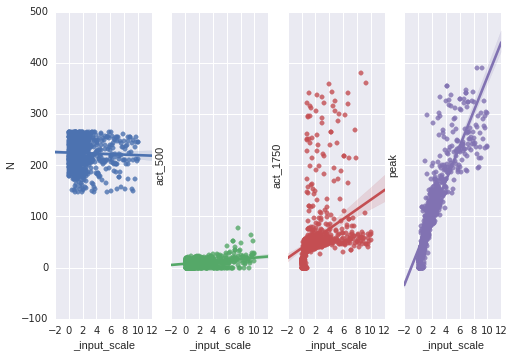

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, sharey = True)
x = '_input_scale'
sns.regplot(x, y = 'N', ax = ax1, data = df)
sns.regplot(x, y = 'act_500', ax = ax2, data = df)
sns.regplot(x, y = 'act_1750', ax = ax3, data = df)
sns.regplot(x, y = 'peak', ax = ax4, data = df)

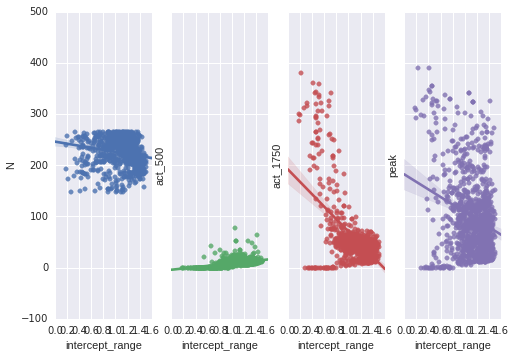

In [15]:
df['intercept_range'] = df['_intercept_high']-df['_intercept_low']
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, sharey = True)
x = 'intercept_range'
sns.regplot(x, y = 'N', ax = ax1, data = df)
sns.regplot(x, y = 'act_500', ax = ax2, data = df)
sns.regplot(x, y = 'act_1750', ax = ax3, data = df)
sns.regplot(x, y = 'peak', ax = ax4, data = df)